In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SIGINT Analysis in Python

*Tags: Inteliigence, NLP, Signals, COMINT, ELINT, Radar*

## Contents
1. Data Overview and Exploration
    - What type of signals did we receive?
    - What source and targets are most active?
2. Identify Entities
    - What entities are communicating
    - What is the relationship between entities
3. Message Prioritization
    - What is the sentiment of each message
    - Do any keywords exist in messages
    - Do any strange patterns exist
4. Concluding Analysis


In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Signal ID,Signal Type,Frequency,Modulation,Encryption,Source,Destination,Content
0,S1,COMINT,2.4 GHz,FM,RSA,A1,A2,“Alpha Two sitrep?”
1,S2,ELINT,10 GHz,AM,NaN,R1,-,Radar pulse
2,S3,COMINT,5 GHz,QPSK,AES,B1,B2,"“Bravo One to Bravo Two, we have a target in s..."
3,S4,ELINT,15 GHz,FSK,NaN,R2,-,Radar sweep
4,S5,COMINT,3 GHz,PSK,RSA,C1,A1,"“Charlie One to Alpha One, we are under attack!”"


In [5]:
df.describe()

,Signal ID,Signal Type,Frequency,Modulation,Encryption,Source,Destination,Content
count,35,35,35,35,14,35,21,35
unique,35,2,21,10,5,21,9,28
top,S1,ELINT,2.4 GHz,QAM,DES,A1,A1,Radar chirp
freq,1,18,6,7,5,3,5,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Signal ID    35 non-null     object
 1   Signal Type  35 non-null     object
 2   Frequency    35 non-null     object
 3   Modulation   35 non-null     object
 4   Encryption   14 non-null     object
 5   Source       35 non-null     object
 6   Destination  21 non-null     object
 7   Content      35 non-null     object
dtypes: object(8)
memory usage: 2.3+ KB


From the above summaries we can see there are a few attributes that have null entries. We know this because we have 35 rows total and some values are less than 35. 

We can make our data more readable by replacing some nulls with domain friendly language. For example, we can replace null values in the Encryption column with the value "Unecnrypted" or "Unknown".

*Note: that for some data nulls are appropriate. Destination being null is valid is the source is not transmitting a message to anyone but just creating a signal based on an action.*

In [7]:
#data prep

#replace NaN values in Encryption column with the value 'Unencrypted'
df.Encryption = df['Encryption'].fillna("Unencrypted")

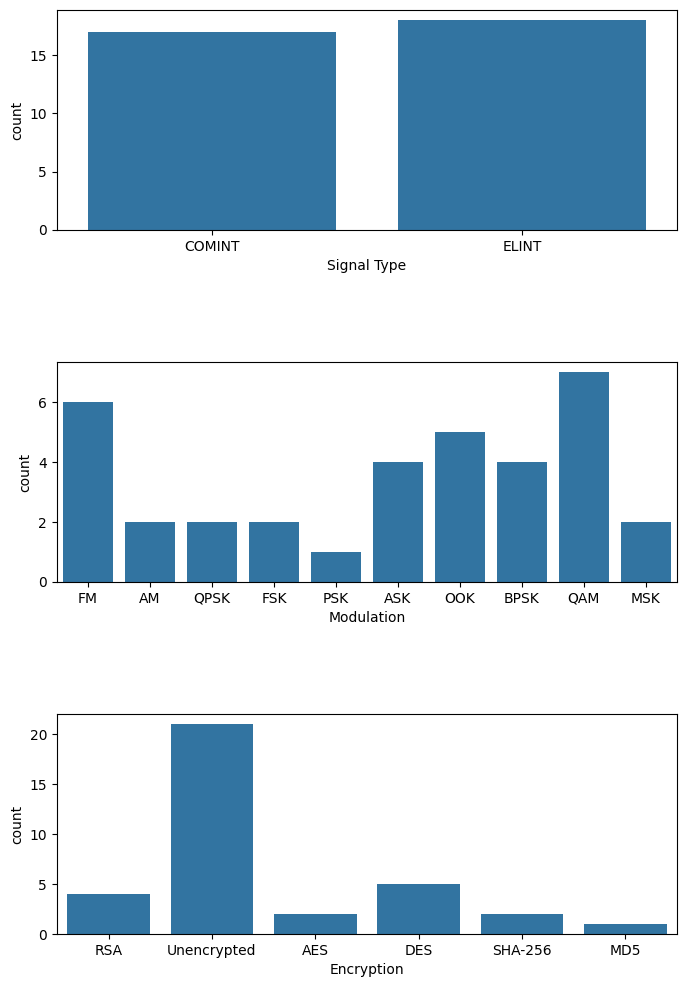

In [8]:
# visualize the signal types and encryption types present in the data.
fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(8,12))

# get count by Signal Type
sns.countplot(data = df, x='Signal Type', ax=axes[0])

# get count by Modulation
sns.countplot(data = df, x='Modulation', ax=axes[1])

# get count by Encryption type
sns.countplot(data = df, x='Encryption', ax=axes[2])

plt.subplots_adjust(wspace=0.6, hspace=0.6)
plt.show()


Analysis:
- About half our signals are COMINT messages and half are ELINT
- There is a wide range of modulation types but QAM makes up the majority followed by FM
- Most signals are unencrypted while DES is the most common encryption. There is also one MD5 encrypted message.

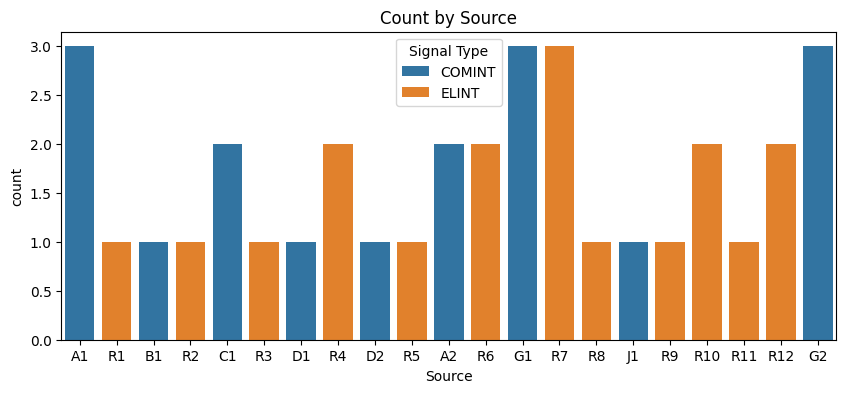

In [16]:
# What sources are most active.
fig = plt.figure(figsize=(10,4))

axes = sns.countplot(data=df, x='Source', hue='Signal Type')
axes.set_title('Count by Source')


plt.show()

From the plot above we can see that all ELINT signals are from sources that start with the letter R. All our COMINT messages are from sources labeled A, B, C, D, G, and J. 

This may be useful later. 

Additionally, there are more messages from source A1, G1, and G2. R7 also emits the most signals from ELINT messages.

G1 and G2 have the most messages indicating there may be some importance to G sources. 